In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
df=pd.read_excel('customer data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [4]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

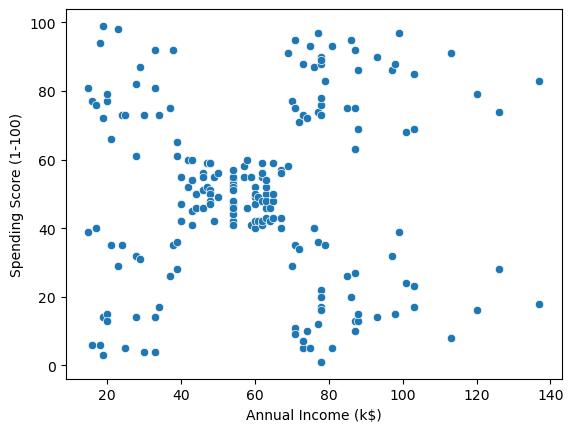

In [6]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_scale=ss.fit_transform(df)

In [8]:
from sklearn.cluster import KMeans

In [9]:
import warnings
warnings.filterwarnings('ignore')
wcss =[]
for i in range(2,31):
    km=KMeans(n_clusters=i)

    km.fit(df_scale)

    #wcss
    wcss.append(km.inertia_)
    

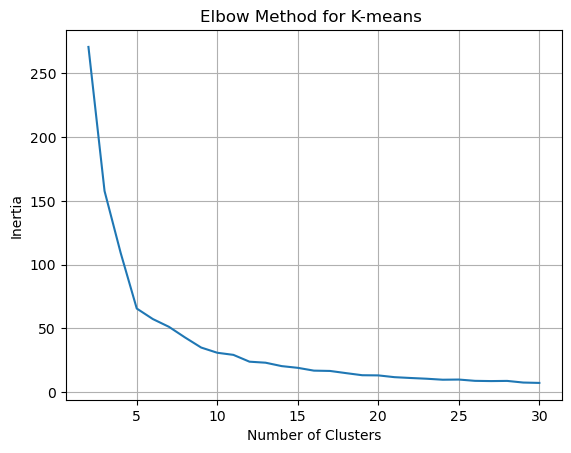

In [10]:
plt.title('Elbow Method for K-means ')
plt.plot(range(2,31),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
km=KMeans(n_clusters=5)

km.fit(df_scale)

df['kmean cluster']=km.predict(df_scale)



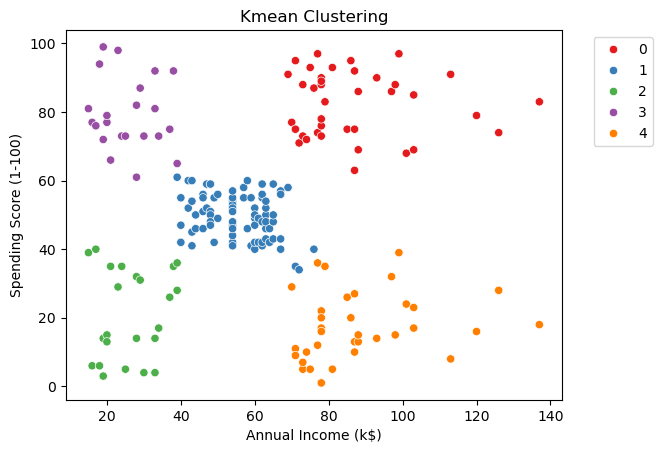

In [12]:
plt.title('Kmean Clustering')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='kmean cluster',palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [13]:
df[(df['kmean cluster']==0) | (df['kmean cluster']==4)]

,Annual Income (k$),Spending Score (1-100),kmean cluster
123,69,91,0
124,70,29,4
125,70,77,0
127,71,95,0
128,71,11,4
...,...,...,...
195,120,79,0
196,126,28,4
197,126,74,0
198,137,18,4


In [14]:
from scipy.cluster.hierarchy import dendrogram,linkage

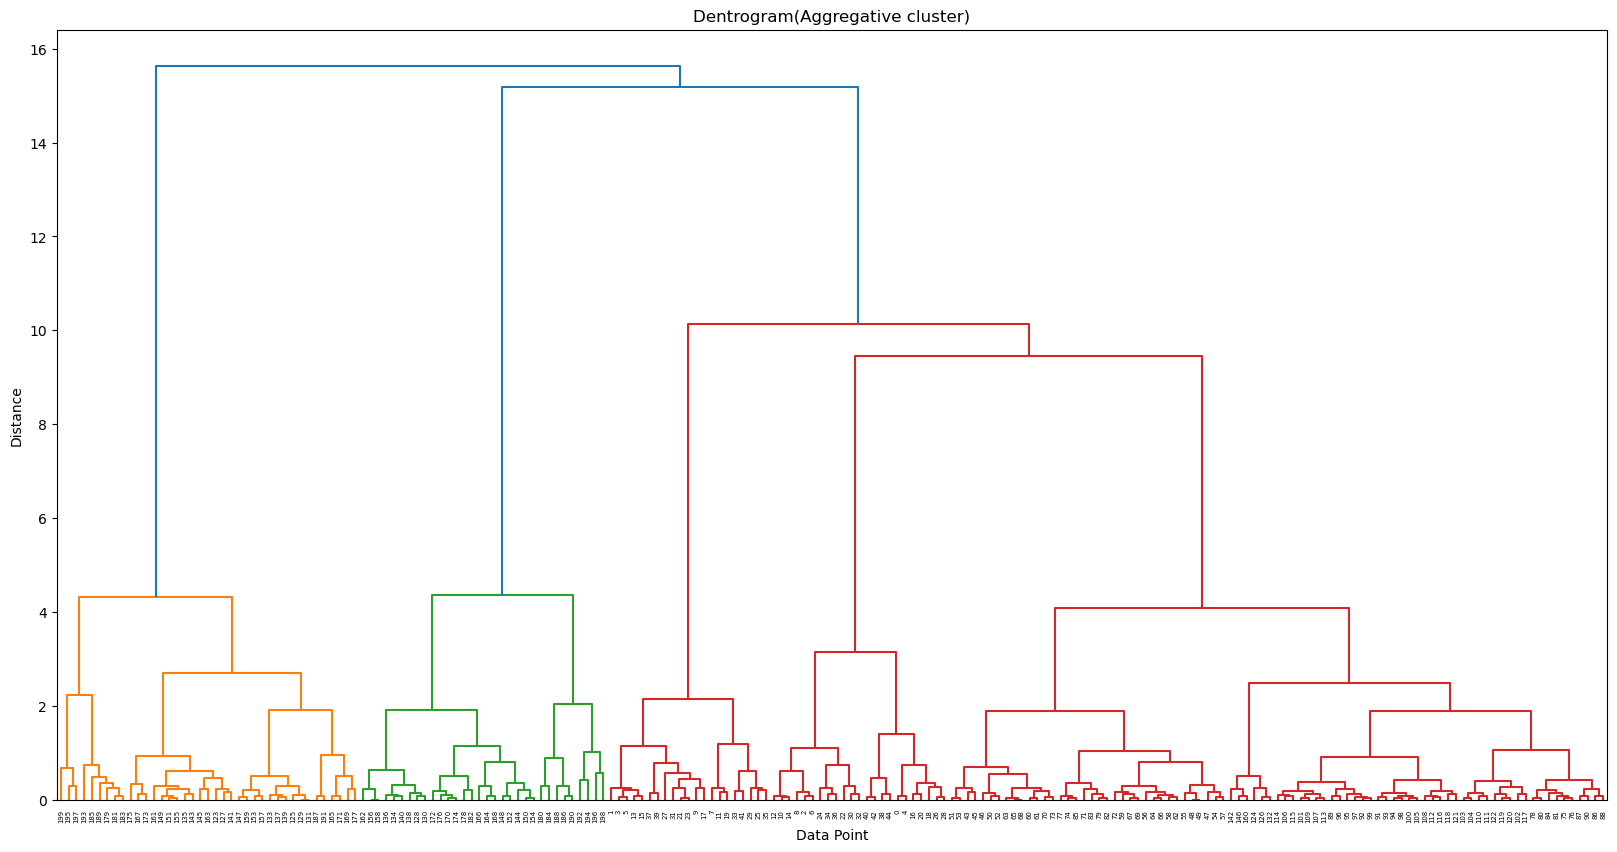

In [15]:
plt.figure(figsize=(20,10))
linked=linkage(df_scale,method='ward')
dendrogram(linked)
plt.title('Dentrogram(Aggregative cluster)')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=5)
df['Agglomerative Cluster']=ac.fit_predict(df_scale)

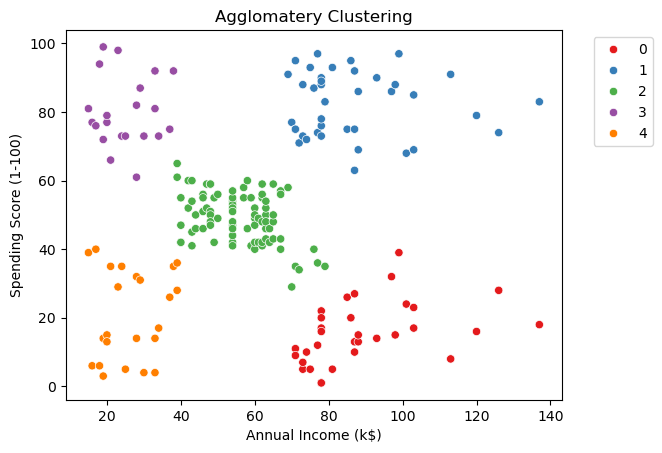

In [17]:
plt.title('Agglomatery Clustering')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Agglomerative Cluster',palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [18]:
#DBSCAN(DENSITY BASED SPECIAL CLUSTER APPLICATION NOISE)
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [19]:
ne=NearestNeighbors(n_neighbors=4)
ne_fit=ne.fit(df_scale)
distances,indices = ne_fit.kneighbors(df_scale)


In [20]:
distances=np.sort(distances[:,3])

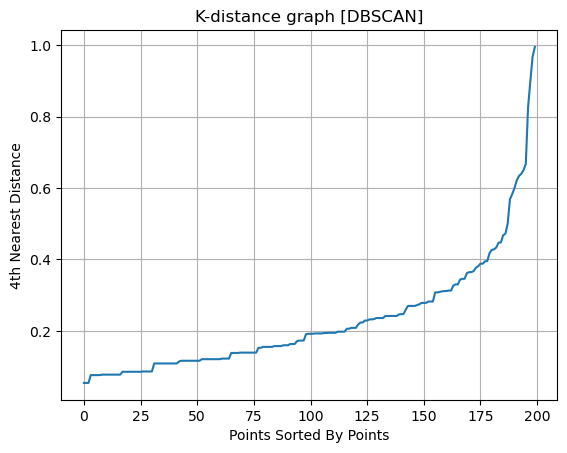

In [21]:
#shows the distance of each datapoint to its 4th nearest neighbour
plt.Figure(figsize=(6,4))
plt.plot(distances)
plt.title('K-distance graph [DBSCAN]')
plt.xlabel('Points Sorted By Points')
plt.ylabel('4th Nearest Distance')
plt.grid(True)
plt.show()

In [22]:
dbscan = DBSCAN(eps=0.4)

In [23]:
df['DBSCAN Cluster']=dbscan.fit_predict(df_scale)

In [24]:
df

,Annual Income (k$),Spending Score (1-100),kmean cluster,Agglomerative Cluster,DBSCAN Cluster
0,15,39,2,4,0
1,15,81,3,3,0
2,16,6,2,4,1
3,16,77,3,3,0
4,17,40,2,4,0
...,...,...,...,...,...
195,120,79,0,1,-1
196,126,28,4,0,-1
197,126,74,0,1,-1
198,137,18,4,0,-1


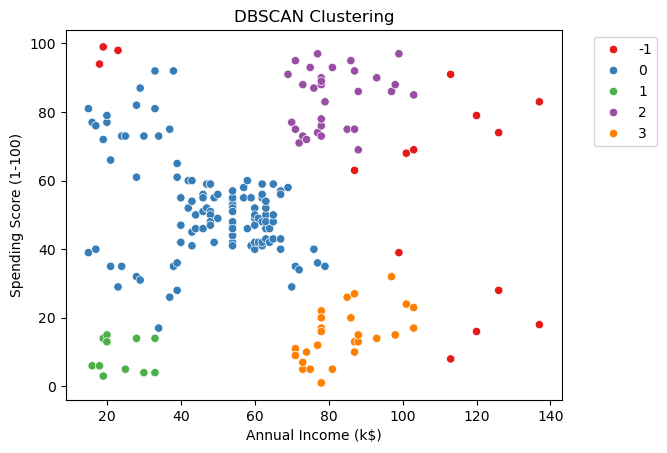

In [25]:
plt.title('DBSCAN Clustering')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='DBSCAN Cluster',palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [26]:
df[df['DBSCAN Cluster']==-1]

,Annual Income (k$),Spending Score (1-100),kmean cluster,Agglomerative Cluster,DBSCAN Cluster
7,18,94,3,3,-1
11,19,99,3,3,-1
19,23,98,3,3,-1
169,87,63,0,1,-1
184,99,39,4,0,-1
187,101,68,0,1,-1
191,103,69,0,1,-1
192,113,8,4,0,-1
193,113,91,0,1,-1
194,120,16,4,0,-1
